<a href="https://colab.research.google.com/github/Sitraka17/Learning-Data-Science/blob/main/LDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Allocation de Dirichlet latente
Dans le domaine du traitement automatique des langues, l’allocation de Dirichlet latente ou LDA est **un modèle génératif probabiliste** permettant d’expliquer des ensembles d’observations, par le moyen de groupes non observés, eux-mêmes définis par des *similarités de données.* 

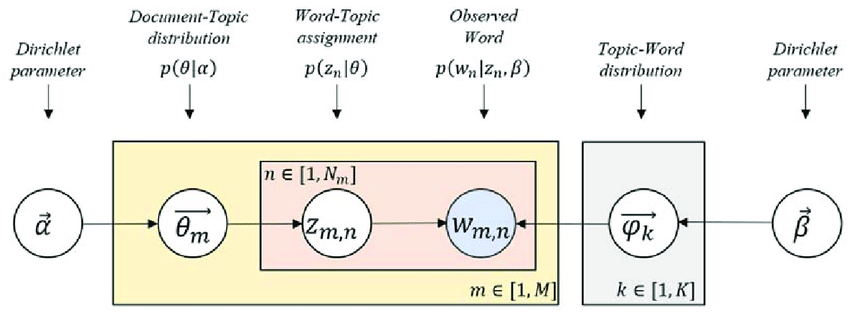

LDA est utilisé pour classer le texte d'un document dans un sujet particulier. Elle construit un modèle de sujet par document et un modèle de mots par sujet, modélisés comme des distributions de Dirichlet.

Chaque document est modélisé comme une distribution multinomiale de sujets et chaque sujet est modélisé comme une distribution multinomiale de mots.
LDA part du principe que chaque morceau de texte que nous lui soumettons contient des mots qui sont liés d'une manière ou d'une autre. Il est donc crucial de choisir le bon corpus de données.
Elle suppose également que les documents sont produits à partir d'un mélange de sujets. Ces sujets génèrent ensuite des mots sur la base de leur distribution de probabilité.

 #Step 1: Load the dataset 
 

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

In [2]:
print(list(newsgroups_train.target_names)) #This is the code based on https://github.com/priya-dwivedi/Deep-Learning/blob/master/topic_modeling/LDA_Newsgroup.ipynb ^^

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
# Lets look at some sample news
newsgroups_train.data[:2]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [4]:
print(newsgroups_train.filenames.shape, newsgroups_train.target.shape)

(11314,) (11314,)


# Step 2: Data Preprocessing 

**Tokenization**: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
Words that have fewer than 3 characters are removed.
All **stopwords** are removed.
Words are **lemmatized** - words in third person are changed to first person and verbs in past and future tenses are changed into present.
Words are **stemmed** - words are reduced to their root form.

In [5]:
# pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [6]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Lemmatizer Example¶

In [7]:

print(WordNetLemmatizer().lemmatize('went', pos = 'v')) # past tense to present tense

go
